# Data Exploration
The goal of this step is to test for any statisctically significant results in the previously cleaned data. We will do this by first graphing the data, then testing for normality, skew, and kertosis before performing a series of ANOVA tests.  

First, we have to load the data into this workbook that we had previously cleaned.

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
df = pd.read_excel('reaction_time_cleaned.xlsx')
df.head()

,sex,gender,ethnicity,age,tech_level,user_id,method,round,time
0,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 1,0.325000
1,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 1,0.331990
2,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 1,0.298999
3,Male,Male,Asian,25-44,10,3007,Mouse,Round 1,0.362000
4,Male,Male,Asian,25-44,10,3007,Spacebar,Round 1,0.328999


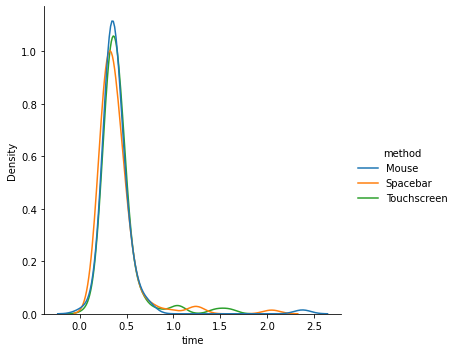

In [10]:
#Simple distribution plot to see if there is clear overlap in the methods used for the reaction time test. 
sns.displot(df, x="time", hue='method', kind="kde")

There appears to be no graphical evidence for a difference in means by method in the distribution plot. Next, we will use a boxplot to more closely examine the data.

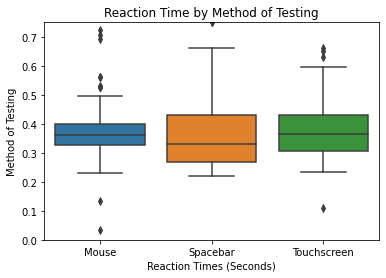

method
Mouse           99
Spacebar       102
Touchscreen     98
dtype: int64


In [102]:
ax = sns.boxplot(x='method', y='time', data=df)
ax.set_ylim(0, .75)
plt.title('Reaction Time by Method of Testing')
plt.ylabel('Method of Testing')
plt.xlabel('Reaction Times (Seconds)')
plt.show()
plt.show()
print(df_out.groupby(['method']).size())

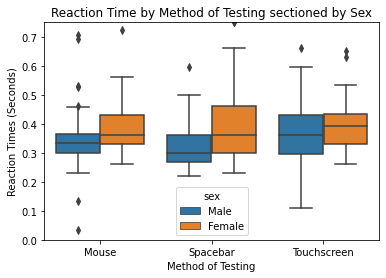

sex
Female    152
Male      147
dtype: int64


In [103]:
ax = sns.boxplot(x='method', y='time', data=df, hue = 'sex')
ax.set_ylim(0, .75)
plt.title('Reaction Time by Method of Testing sectioned by Sex')
plt.xlabel('Method of Testing')
plt.ylabel('Reaction Times (Seconds)')
plt.show()
print(df_out.groupby(['sex']).size()) 

Here too there is no graphical evidence for the any difference in the means of the 3 testing methods. We are now going to check normality, skew, and kurtosis before performing a series of ANOVA tests. 

Scipy has a bunch of great tools and packages to help determine these metrics for our data.   

Normality - [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)  
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  

Kurtosis - [scipy.stats.kurtosistest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest)  
The Kurtosis will test the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.  

Skew -  [scipy.stats.skewtest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest)   
The Skewness will test the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.  






 
 

In [19]:
import scipy.stats as scipy

In [20]:
#Testing the Mouse testing method
print(scipy.shapiro(df[df['method'] == 'Mouse']['time']))
print(scipy.kurtosistest(df[df['method'] == 'Mouse']['time']))
print(scipy.skewtest(df[df['method'] == 'Mouse']['time']))

ShapiroResult(statistic=0.4087646007537842, pvalue=3.2016697693112635e-18)
KurtosistestResult(statistic=7.848638572155573, pvalue=4.205777472682012e-15)
SkewtestResult(statistic=10.857725664085969, pvalue=1.8325644031232753e-27)


In [21]:
#Testing the Spacebar testing method
print(scipy.shapiro(df[df['method'] == 'Spacebar']['time']))
print(scipy.kurtosistest(df[df['method'] == 'Spacebar']['time']))
print(scipy.skewtest(df[df['method'] == 'Spacebar']['time']))

ShapiroResult(statistic=0.5605732202529907, pvalue=3.270073130922285e-16)
KurtosistestResult(statistic=6.861495662756713, pvalue=6.814327380097587e-12)
SkewtestResult(statistic=9.135352927781693, pvalue=6.519377848917119e-20)


In [22]:
#Testing the Touchscreen testing method
print(scipy.shapiro(df[df['method'] == 'Touchscreen']['time']))
print(scipy.kurtosistest(df[df['method'] == 'Touchscreen']['time']))
print(scipy.skewtest(df[df['method'] == 'Touchscreen']['time']))

ShapiroResult(statistic=0.6088689565658569, pvalue=6.3633824500929775e-15)
KurtosistestResult(statistic=6.119653865197085, pvalue=9.377883937881882e-10)
SkewtestResult(statistic=8.210586361579109, pvalue=2.201109241993372e-16)


## ANOVA
The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. This is what I should be using, but for now we will work with standard linear regression and ignore the Shapiro-Wilk test results...

In [23]:
import statsmodels.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from statsmodels.stats.anova import anova_lm

In [24]:
#All possible variables
df.columns.values.tolist()

['sex',
 'gender',
 'ethnicity',
 'age',
 'tech_level',
 'user_id',
 'method',
 'round',
 'time']

In [25]:
#To start, let's try a simple anova using time as our response and method as the independent variable.
method = ols(formula='time ~ method', data=df).fit()
print(method.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3433
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.710
Time:                        10:38:03   Log-Likelihood:                 25.214
No. Observations:                 305   AIC:                            -44.43
Df Residuals:                     302   BIC:                            -33.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.39

There appears to no statistical significance between the methods when it comes to response time. Let us check the predicted vs actual to see how the model faired. 

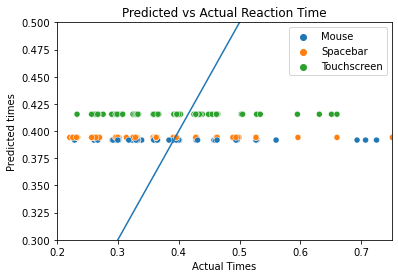

In [26]:
ax = sns.scatterplot(y = method.predict(), x = 'time', hue='method', data = df)
ax = sns.lineplot(x = 'time', y = 'time', data = df)
ax.set_ylim(0.3, .5)
ax.set_xlim(0.2, .75)
plt.title('Predicted vs Actual Reaction Time')
plt.ylabel('Predicted times')
plt.xlabel('Actual Times')
plt.show()

In [27]:
scipy.pearsonr(method.predict(), df.time)

(0.0476244936110625, 0.4072282045247072)

Not well. With a pearson correlation of only 0.05 and a p value of 0.35 these do not appear to have any correlation. This model does not explain the data.  

Next, we will try a model including more explanitory variables namely, sex, ethnicity, age, technical skill, the round of test, and the method used for testing.  

In [88]:
time = ols(formula='time ~sex + ethnicity + age + C(tech_level) + round + method', data=df).fit()
print(time.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4.736
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.30e-09
Time:                        19:05:01   Log-Likelihood:                 64.649
No. Observations:                 305   AIC:                            -91.30
Df Residuals:                     286   BIC:                            -20.61
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

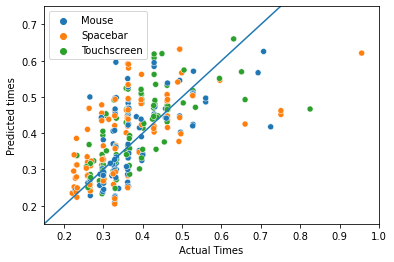

In [89]:
ax = sns.scatterplot(y = time.predict(), x = 'time', hue='method', data = df)
ax = sns.lineplot(x = 'time', y = 'time', data = df)
ax.set_ylim(0.15, .75)
ax.set_xlim(0.15, 1)
plt.ylabel('Predicted times')
plt.xlabel('Actual Times')
plt.show()

In [90]:
scipy.pearsonr(time.predict(), df.time)

(0.47917825012086585, 6.48959881583549e-19)

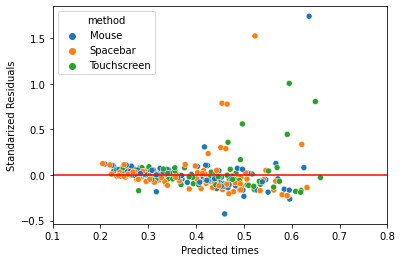

In [92]:
ax = sns.scatterplot(x = time.predict(), y = time.resid, hue='method', data = df)
plt.axhline(y=0.0, color='r', linestyle='-')
ax.set_xlim(0.1, .8)
plt.xlabel('Predicted times')
plt.ylabel('Standarized Residuals')
plt.show()

This model explains more of the data, but it does not show any statistical significance between the methods when it comes to response time. The graphs of residuals and predicted vs actual do show some outlier datapoints. We will remove those and then test these methods again. 

# Outliers
We are going to remove each datapoint that falls more than 3 standard deviations from the mean in each catagory. 

In [93]:
df_out = df[np.abs(df.time - df.time.mean()) <= (3*df.time.std())]
df_out.shape

(299, 9)

Max of Mouse: 1.055999


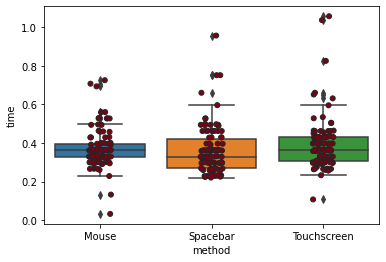

In [33]:
#Box plot of the remaining values
print("Max of Mouse:", max(df_out[df_out['method'] == 'Touchscreen']['time']))
ax = sns.boxplot(x='method', y='time', data=df_out)
ax = sns.stripplot(x='method', y='time', data=df_out, color='#7d0013', linewidth = 1)
plt.show()

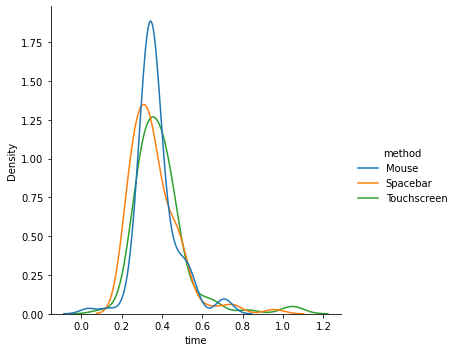

In [34]:
sns.displot(df_out, x="time", hue='method', kind="kde")

In [96]:
print(scipy.shapiro(df_out['time']))

ShapiroResult(statistic=0.8349021077156067, pvalue=3.443334845248785e-17)


In [98]:
#Test the simple model again.
method = ols(formula='time ~ method', data=df_out).fit()
print(method.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.740
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.177
Time:                        23:18:45   Log-Likelihood:                 208.00
No. Observations:                 299   AIC:                            -410.0
Df Residuals:                     296   BIC:                            -398.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.37

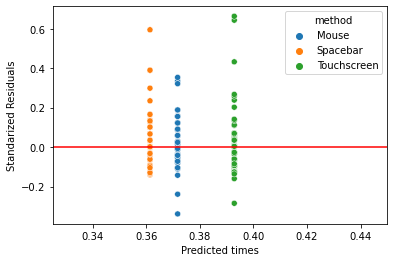

In [99]:
ax = sns.scatterplot(x = method.predict(), y = method.resid, hue='method', data = df_out)
plt.axhline(y=0.0, color='r', linestyle='-')
#ax.set_ylim(-0.5, .75)
ax.set_xlim(0.325, .45)
plt.xlabel('Predicted times')
plt.ylabel('Standarized Residuals')
plt.show()

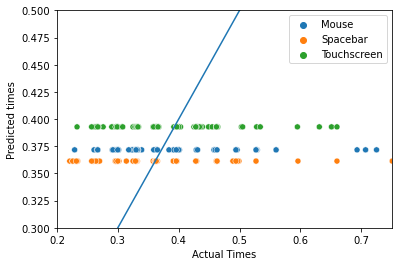

In [100]:
ax = sns.scatterplot(y = method.predict(), x = 'time', hue='method', data = df_out)
ax = sns.lineplot(x = 'time', y = 'time', data = df)
ax.set_ylim(0.3, .5)
ax.set_xlim(0.2, .75)
plt.ylabel('Predicted times')
plt.xlabel('Actual Times')
plt.show()

There appears to no statistical significance between the methods when it comes to response time. Removing the outliers does not improve the model in any signigicant way. The graphed data does not give us any confidence in the output of the model either.  
  
Let's check the more complex model next. 


In [101]:
time = ols(formula='time ~ sex + ethnicity + age + round + method', data=df_out).fit()
print(time.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.28e-18
Time:                        23:18:59   Log-Likelihood:                 267.36
No. Observations:                 299   AIC:                            -504.7
Df Residuals:                     284   BIC:                            -449.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

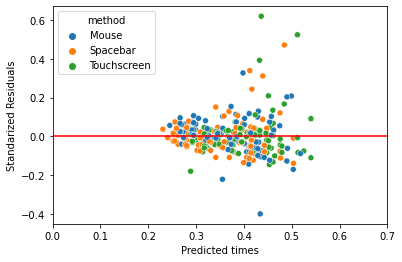

In [47]:
ax = sns.scatterplot(x = time.predict(), y = time.resid, hue='method', data = df_out)
plt.axhline(y=0.0, color='r', linestyle='-')
#ax.set_ylim(-0.5, .75)
ax.set_xlim(0.0, .7)
plt.xlabel('Predicted times')
plt.ylabel('Standarized Residuals')
plt.show()

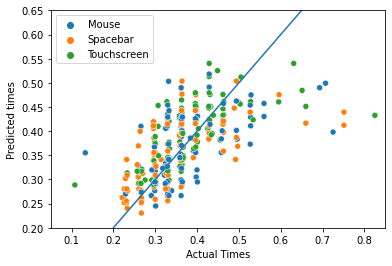

In [48]:
ax = sns.scatterplot(y = time.predict(), x = 'time', hue='method', data = df_out)
ax = sns.lineplot(x = 'time', y = 'time', data = df_out)
ax.set_ylim(0.2, .65)
ax.set_xlim(0.05, .85)
plt.ylabel('Predicted times')
plt.xlabel('Actual Times')
plt.show()

In [51]:
pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56775 sha256=b564e6835a0873a41800e132d2ffea49834dc9ef6fe24299998e4b9a04527484
  Stored in directory: c:\users\elijah\appdata\local\pip\cache\wheels\40\b8\82\23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32067 sha256=fe926cd4d4da728effc9aac3c9412edc5397c2e8973f8728559cc59a0594216a
  Stored in directory: c:\users\elijah\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=d678585e4c675eeea5ab599451c7d0efd0d08c07dc3a4e06054ed7fdaec4e9fe
  Stored in directory: c:\users\elijah\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText
Note: you may need to restart the kernel to use updated packages.


In [53]:
from bioinfokit.analys import stat
formula = 'time ~ sex + ethnicity + age + method + round'
res = stat()
res.tukey_hsd(df=df_out, res_var='time', xfac_var='method', anova_model= formula)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Mouse,Spacebar,0.010320,-0.023432,0.044072,1.018881,0.732082
1,Mouse,Touchscreen,0.021146,-0.012944,0.055235,2.066922,0.311617
2,Spacebar,Touchscreen,0.031466,-0.002373,0.065305,3.098464,0.074537


This is a much better model for explaining the data. Unfortunatly there is still no statistical difference in the groups. The largest find in this version of the test was the effect of the round number on testing, which will be investigated next. Otherwies, the graphes of this data look more normalized when the outliers have been removed. 

In [54]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_out, res_var='time', xfac_var='round', anova_model='time ~ method')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Round 1,Round 2,0.075024,0.013969,0.136079,4.769716,0.007477
1,Round 1,Round 3,0.087094,0.025537,0.148651,5.491901,0.001194
2,Round 1,Round 4,0.060284,-0.000770,0.121339,3.832631,0.054881
3,Round 1,Round 5,0.057615,-0.003687,0.118917,3.648148,0.076959
4,Round 2,Round 3,0.012070,-0.048719,0.072859,0.770724,0.900000
5,Round 2,Round 4,0.014740,-0.045541,0.075020,0.949125,0.900000
6,Round 2,Round 5,0.017409,-0.043122,0.077940,1.116358,0.900000
7,Round 3,Round 4,0.026810,-0.033979,0.087599,1.711906,0.718576
8,Round 3,Round 5,0.029479,-0.031558,0.090516,1.874678,0.653492
9,Round 4,Round 5,0.002669,-0.057862,0.063200,0.171164,0.900000


It appears that round number has a signigicant impact on the response times. This is only true for the first round, but it appears to catch people off guard and they perform worse in round one than any following round. This effect appears to tapper off by round 5 as fatiuge begins to set in.  

Next we are going to test a bunch of ANOVA models to try and find ones that work better than the ones previously tested. 

In [55]:
method = ols(formula='time ~ method', data=df_out).fit()
method1 = ols(formula='time ~ method + C(user_id)', data=df_out).fit()
method2 = ols(formula='time ~ method * C(user_id)', data=df_out).fit()
method3 = ols(formula='time ~ method + C(user_id) + (method * C(user_id))', data=df_out).fit()
sex3 = ols(formula='time ~ method + sex + (sex * C(method))', data=df_out).fit()
sex1 = ols(formula='time ~ method + sex', data=df_out).fit()
sex2 = ols(formula='time ~ method * sex', data=df_out).fit()
round3 = ols(formula='time ~ method + round + (round * method)', data=df_out).fit()
round2 = ols(formula='time ~ method * round', data=df_out).fit()
round1 = ols(formula='time ~ method + round', data=df_out).fit()


In [56]:
anova_lm(time, method,method1, method2, method3, sex1, sex2, sex3, round1, round2, round3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,284.0,2.927744,0.0,NaN,NaN,NaN
1,296.0,4.354594,-12.0,-1.426850,8.449544,NaN
2,278.0,2.789739,18.0,1.564854,6.177856,1.121413e-12
3,242.0,2.151629,36.0,0.638111,1.259592,1.587172e-01
4,242.0,2.151629,-0.0,-0.000000,NaN,NaN
5,295.0,4.281088,-53.0,-2.129459,2.855156,NaN
6,293.0,4.241945,2.0,0.039143,1.390784,2.505182e-01
7,293.0,4.241945,-0.0,-0.000000,NaN,NaN
8,292.0,4.086803,1.0,0.155143,11.024717,1.013231e-03
9,284.0,3.996520,8.0,0.090282,0.801955,6.013018e-01
